In [9]:
from gibbs.utils import lattice_hamiltonian
from gibbs.preparation.varqite import efficientTwoLocalansatz
from gibbs.dataclass import GibbsResult
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem
from qiskit.algorithms.time_evolvers.variational import VarQITE
from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit.algorithms.gradients import ReverseEstimatorGradient, ReverseQGT
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem
from qiskit.algorithms.time_evolvers.variational import VarQITE
from gibbs.plots.plots import preparation
import numpy as np

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
H = lattice_hamiltonian(num_qubits:=4,0.25,-1,["X"],["ZZ"])
H_vec = KLocalPauliBasis(2,num_qubits).pauli_to_vector(H)

# basis = KLocalPauliBasis(2,num_qubits:=4)
# H_vec = np.random.uniform(-1,1,basis.size)
# H= basis.vector_to_pauli_op(H_vec)

ansatz_arguments = dict(num_qubits=num_qubits,depth=2,entanglement="reverse_linear",su2_gates=["rx","ry","rz"],ent_gates=["cx"],barriers=True)
ansatz,x0 = efficientTwoLocalansatz(**ansatz_arguments)
problem = TimeEvolutionProblem(hamiltonian = H^"I"*num_qubits, time = 1/2)
variational_principle = ImaginaryMcLachlanPrinciple(gradient = ReverseEstimatorGradient(), qgt = ReverseQGT() )
varqite = VarQITE(ansatz,x0,num_timesteps=1 )
result_varqite = varqite.evolve(problem)
gibbs_result = GibbsResult(ansatz_arguments=ansatz_arguments,
                        parameters=result_varqite.parameter_values,
                        coriginal=H_vec,
                        num_qubits=num_qubits,
                        klocality=2,
                        betas = [2 *t for t in result_varqite.times],
                        stored_qgts = None,
                        stored_gradients = None,
                          
)

SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j,
 -1.  +0.j])


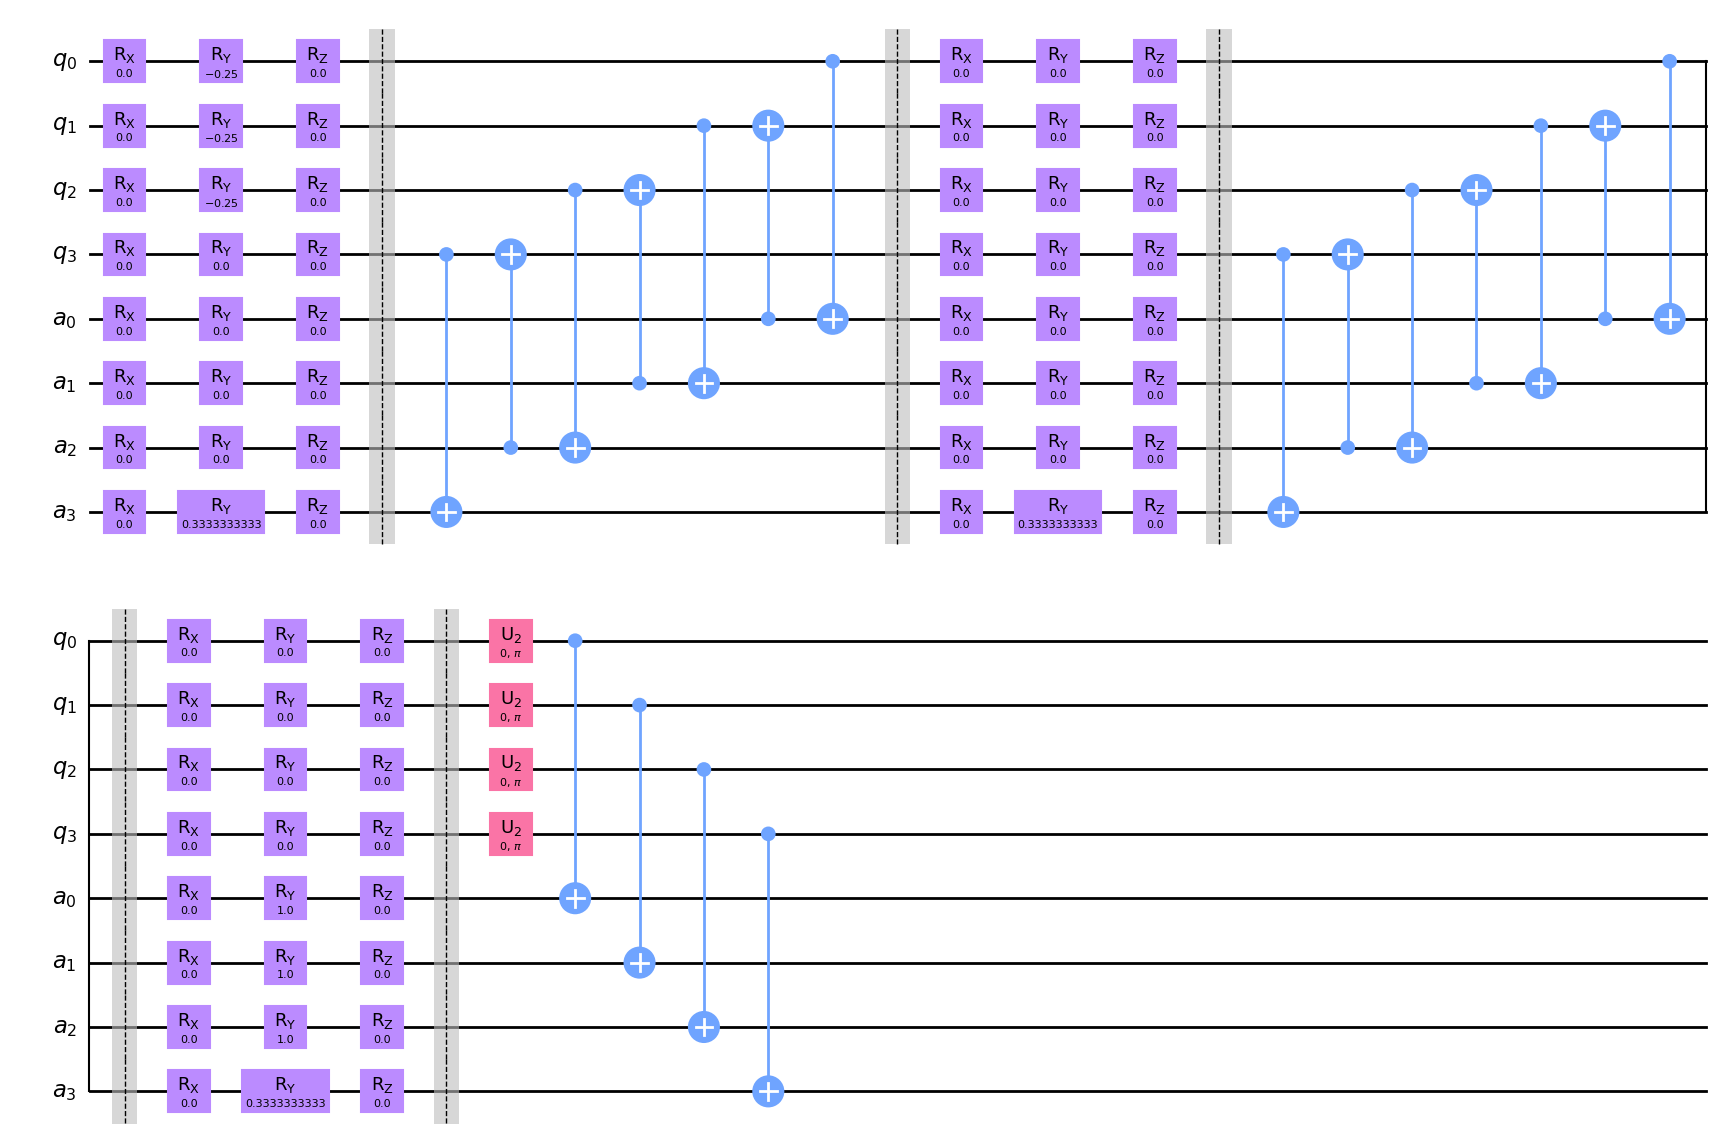

(39,) (39,) (39,)


In [15]:
print(H)
gibbs_result.parameters[-1]=np.around(gibbs_result.parameters[-1],10)
display(gibbs_result.state_ansatz(-1).decompose().draw(output="mpl"))
preparation(gibbs_result,-1)

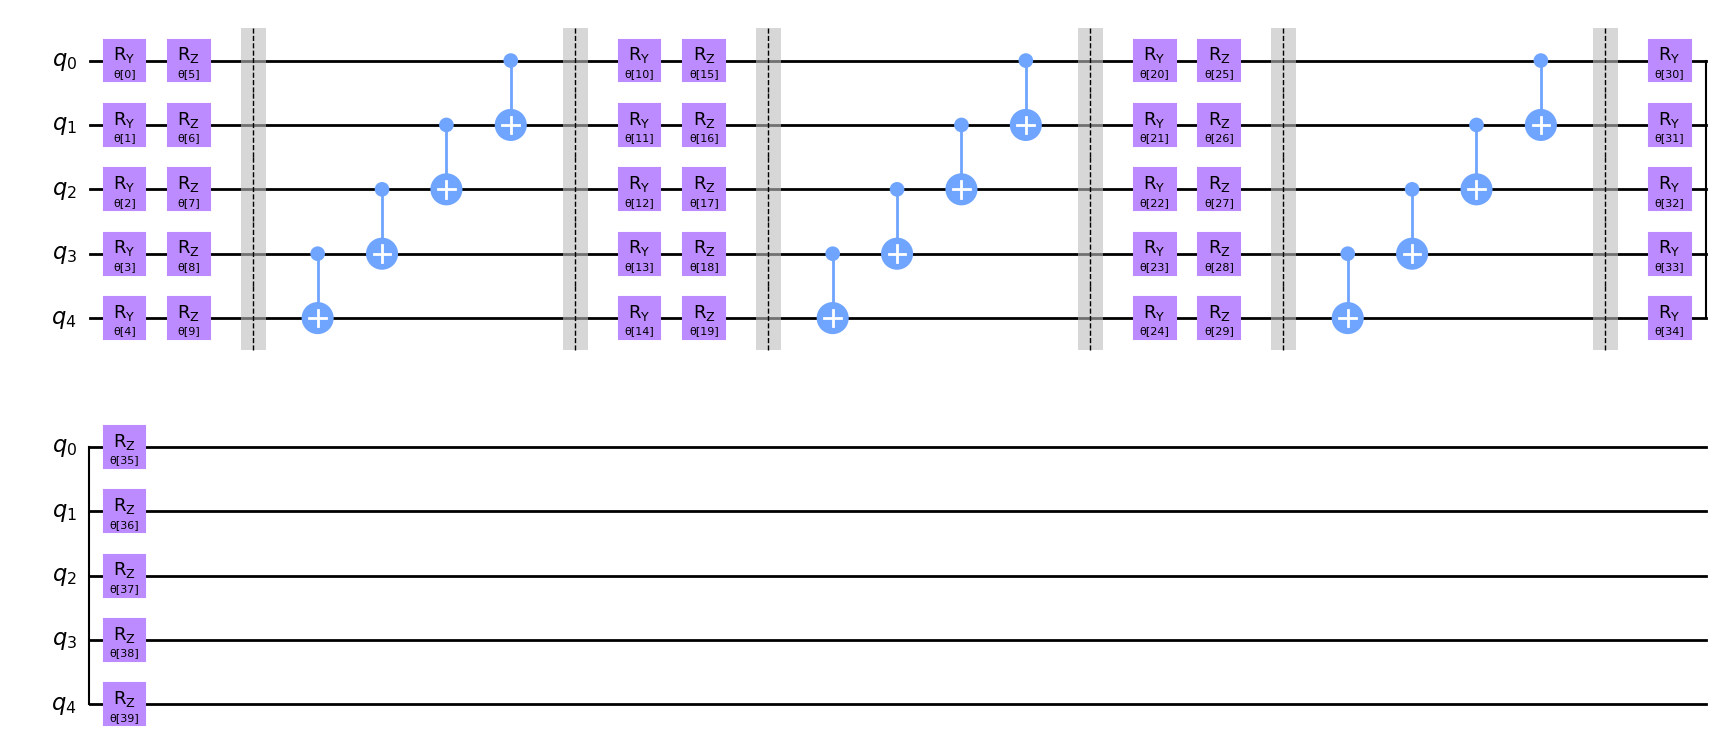

In [2]:
from qiskit.circuit.library import EfficientSU2
EfficientSU2(5,insert_barriers=True).decompose().draw(output="mpl")